In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv(r'C:\Users\ketan\Downloads\Patient_Survival_Detection_dataset.csv')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
raw_data.shape

(91713, 186)

In [5]:
raw_data.isna().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                               4228
bmi                               3429
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
hospital_admit_source            21409
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                            2720
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [6]:
raw_data.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [7]:
raw_data.corr()['hospital_death']

encounter_id                    -0.005243
patient_id                       0.004877
hospital_id                     -0.001255
hospital_death                   1.000000
age                              0.111017
bmi                             -0.031247
elective_surgery                -0.093574
height                          -0.019526
icu_id                           0.000994
pre_icu_los_days                 0.063316
readmission_status                    NaN
weight                          -0.038362
albumin_apache                  -0.193809
apache_2_diagnosis              -0.089862
apache_3j_diagnosis             -0.090715
apache_post_operative           -0.083674
arf_apache                       0.027309
bilirubin_apache                 0.137464
bun_apache                       0.181435
creatinine_apache                0.114699
fio2_apache                      0.212249
gcs_eyes_apache                 -0.260373
gcs_motor_apache                -0.282449
gcs_unable_apache                0

In [8]:
raw_data['readmission_status'].value_counts()

0    91713
Name: readmission_status, dtype: int64

In [9]:
# Removing columns that have more than 30,000 null values and the columns that are not useful.
# We are removing 'bmi' column as well because we already have 'height' and 'weight' columns separately.
threshold = len(raw_data) - 30000
drop_cols = ['encounter_id','patient_id','hospital_id','bmi','icu_id','readmission_status']
data = raw_data.dropna(axis=1, thresh=threshold).drop(drop_cols, axis=1)

In [10]:
data.isna().sum()

hospital_death                       0
age                               4228
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
hospital_admit_source            21409
icu_admit_source                   112
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
weight                            2720
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bun_apache                       19262
creatinine_apache                18853
gcs_eyes_apache                   1901
gcs_motor_apache                  1901
gcs_unable_apache                 1037
gcs_verbal_apache                 1901
glucose_apache                   11036
heart_rate_apache                  878
hematocrit_apache                19878
intubated_apache         

In [11]:
data.shape

(91713, 106)

In [12]:
data.corr()['hospital_death']

hospital_death                   1.000000
age                              0.111017
elective_surgery                -0.093574
height                          -0.019526
pre_icu_los_days                 0.063316
weight                          -0.038362
apache_2_diagnosis              -0.089862
apache_3j_diagnosis             -0.090715
apache_post_operative           -0.083674
arf_apache                       0.027309
bun_apache                       0.181435
creatinine_apache                0.114699
gcs_eyes_apache                 -0.260373
gcs_motor_apache                -0.282449
gcs_unable_apache                0.051774
gcs_verbal_apache               -0.241044
glucose_apache                   0.066430
heart_rate_apache                0.107818
hematocrit_apache               -0.062600
intubated_apache                 0.173139
map_apache                      -0.040526
resprate_apache                  0.086666
sodium_apache                    0.013216
temp_apache                     -0

In [13]:
for i in data.columns:
    print(data[i].value_counts())

0    83798
1     7915
Name: hospital_death, dtype: int64
67.0    2271
68.0    2173
71.0    2141
72.0    2110
66.0    2059
65.0    2051
70.0    2032
63.0    1977
73.0    1972
64.0    1956
69.0    1935
62.0    1930
75.0    1916
74.0    1901
77.0    1883
78.0    1866
76.0    1859
60.0    1858
61.0    1842
59.0    1836
79.0    1783
57.0    1782
58.0    1763
80.0    1702
81.0    1661
56.0    1651
55.0    1644
83.0    1616
54.0    1598
82.0    1590
84.0    1560
53.0    1550
52.0    1484
85.0    1418
51.0    1357
86.0    1295
50.0    1253
87.0    1204
49.0    1096
88.0    1042
48.0     983
89.0     952
47.0     921
46.0     908
45.0     856
44.0     752
43.0     727
42.0     674
41.0     671
40.0     573
36.0     558
35.0     551
34.0     544
38.0     535
39.0     526
37.0     509
33.0     496
30.0     477
32.0     449
26.0     432
31.0     431
28.0     425
29.0     421
25.0     415
27.0     410
24.0     401
23.0     400
22.0     389
21.0     372
19.0     343
20.0     338
18.0     259
17.0   

 0.000000      3711
 0.000694      1403
 0.001389      1011
 0.002083       887
 0.002778       811
 0.003472       780
 0.004861       718
 0.004167       704
 0.006250       651
 0.005556       619
 0.006944       584
 0.007639       534
 0.008333       506
 0.009028       446
 0.009722       432
 0.010417       423
 0.011111       391
 0.011806       345
 0.012500       325
 0.014583       299
 0.013889       298
 0.013194       284
 0.015278       279
 0.016667       273
 0.015972       260
 0.018750       249
 0.019444       233
 0.017361       224
 0.020833       224
 0.018056       215
 0.020139       210
 0.036806       206
 0.065278       205
 0.032639       205
 0.034028       204
 0.040972       204
 0.061111       202
 0.041667       201
 0.022917       199
 0.045139       198
 0.050000       198
 0.021528       197
 0.044444       197
 0.025000       196
 0.053472       195
 0.022222       194
 0.029861       192
 0.038194       192
 0.054167       191
 0.026389       191


13.00     3186
14.00     3173
12.00     3131
15.00     3092
11.00     3023
16.00     2853
10.00     2797
17.00     2602
18.00     2435
9.00      2354
19.00     2337
8.00      2066
20.00     2051
21.00     1923
22.00     1820
23.00     1574
24.00     1512
7.00      1506
25.00     1327
26.00     1264
6.00      1141
28.00     1091
27.00     1090
29.00      995
30.00      951
31.00      880
32.00      863
4.00       776
33.00      768
34.00      754
5.00       744
35.00      703
36.00      670
38.00      639
37.00      635
40.00      523
39.00      516
41.00      514
42.00      508
43.00      460
46.00      429
44.00      426
45.00      417
50.00      370
48.00      368
127.00     355
47.00      344
49.00      333
51.00      329
52.00      319
54.00      312
53.00      311
57.00      253
56.00      252
55.00      252
58.00      240
59.00      227
61.00      214
60.00      214
62.00      206
63.00      197
65.00      176
70.00      170
64.00      163
66.00      157
68.00      141
69.00     

36.40    9347
36.60    8572
36.70    8076
36.30    6667
36.50    6193
36.80    5778
36.20    4802
36.10    4594
36.90    3698
36.00    2807
35.90    2201
37.00    2131
35.80    2039
37.10    1977
35.60    1631
37.20    1486
35.70    1417
37.30     820
35.40     678
37.40     581
35.50     566
35.30     526
32.10     516
35.20     435
35.00     379
39.70     370
36.44     332
35.10     329
36.55     317
37.50     316
37.60     305
36.38     298
36.61     285
36.33     261
36.66     236
36.72     220
37.70     216
39.40     211
34.90     210
34.70     208
34.80     206
34.60     187
34.40     174
36.77     172
36.83     161
39.20     155
39.10     148
39.30     147
38.90     142
34.50     136
38.80     136
39.50     132
36.27     122
36.88     121
37.80     118
34.30     103
36.11      97
36.22      97
34.10      96
39.60      95
36.94      93
38.60      92
39.00      91
34.00      85
38.70      84
34.20      83
32.80      78
38.30      78
38.40      73
32.60      70
33.00      70
38.50 

50.0    3407
51.0    3036
52.0    2864
55.0    2822
53.0    2817
48.0    2778
49.0    2773
47.0    2758
46.0    2739
54.0    2687
45.0    2670
56.0    2628
44.0    2508
57.0    2432
43.0    2413
42.0    2364
58.0    2245
41.0    2208
40.0    2178
59.0    2134
39.0    1919
60.0    1911
38.0    1804
61.0    1669
62.0    1640
37.0    1633
63.0    1487
36.0    1413
35.0    1352
64.0    1333
65.0    1287
34.0    1175
66.0    1111
67.0    1091
33.0    1039
68.0     962
32.0     939
69.0     873
70.0     809
30.0     777
31.0     777
71.0     663
72.0     658
29.0     614
73.0     601
28.0     540
13.0     530
74.0     480
27.0     475
75.0     438
26.0     437
90.0     426
76.0     420
77.0     385
25.0     377
78.0     331
23.0     327
24.0     291
79.0     280
80.0     259
22.0     247
81.0     246
20.0     242
21.0     217
82.0     177
19.0     169
83.0     165
18.0     147
17.0     145
84.0     136
15.0     122
85.0     121
16.0     121
87.0      88
88.0      87
86.0      86
14.0      85

60.0     2291
58.0     2265
55.0     2209
56.0     2175
59.0     2169
62.0     2102
57.0     2085
65.0     2053
63.0     2029
61.0     2012
64.0     1953
67.0     1922
54.0     1900
66.0     1879
68.0     1870
70.0     1849
53.0     1830
52.0     1781
50.0     1778
51.0     1742
69.0     1700
72.0     1649
74.0     1632
71.0     1598
73.0     1550
49.0     1473
48.0     1396
75.0     1369
47.0     1345
76.0     1341
77.0     1250
78.0     1224
46.0     1221
79.0     1186
45.0     1178
80.0     1125
44.0     1104
81.0      977
82.0      966
43.0      923
83.0      894
84.0      874
42.0      865
41.0      836
40.0      816
85.0      730
86.0      705
39.0      675
87.0      655
88.0      617
38.0      609
89.0      556
90.0      512
91.0      493
37.0      491
22.0      482
92.0      465
36.0      441
35.0      429
114.0     409
93.0      402
94.0      399
34.0      365
95.0      353
33.0      294
97.0      292
96.0      286
32.0      282
98.0      246
30.0      239
99.0      210
31.0  

14.00     3619
13.00     3543
15.00     3537
12.00     3530
11.00     3369
16.00     3247
10.00     3102
17.00     2939
18.00     2703
9.00      2639
19.00     2615
8.00      2342
20.00     2319
21.00     2146
22.00     2067
23.00     1777
24.00     1712
7.00      1686
25.00     1501
26.00     1461
6.00      1282
27.00     1265
28.00     1222
29.00     1125
30.00     1052
31.00      989
32.00      940
33.00      860
34.00      843
4.00       828
5.00       818
35.00      783
36.00      736
37.00      713
38.00      697
39.00      598
41.00      584
42.00      570
40.00      569
43.00      502
45.00      489
46.00      484
44.00      460
48.00      402
50.00      399
126.00     397
47.00      394
51.00      375
49.00      369
52.00      348
53.00      331
54.00      327
55.00      284
57.00      275
56.00      268
59.00      264
58.00      252
61.00      237
62.00      233
60.00      231
63.00      210
65.00      197
70.00      183
64.00      177
66.00      169
69.00      168
67.00     

97.0     1354
96.0     1351
92.0     1323
95.0     1318
98.0     1299
102.0    1290
100.0    1287
104.0    1261
99.0     1256
94.0     1247
106.0    1243
103.0    1242
91.0     1241
101.0    1240
93.0     1240
105.0    1212
109.0    1194
107.0    1189
108.0    1170
90.0     1167
88.0     1147
110.0    1144
89.0     1130
113.0    1105
112.0    1104
87.0     1103
86.0     1100
111.0    1077
114.0    1035
115.0    1019
85.0     1007
117.0     996
116.0     979
84.0      931
119.0     922
118.0     902
120.0     894
83.0      880
122.0     876
82.0      845
121.0     839
124.0     827
81.0      801
127.0     777
126.0     768
125.0     764
80.0      757
123.0     753
128.0     732
130.0     705
129.0     694
134.0     673
78.0      658
79.0      650
132.0     648
131.0     637
133.0     632
77.0      630
135.0     624
76.0      589
136.0     574
137.0     572
75.0      522
74.0      515
138.0     509
140.0     500
141.0     500
139.0     489
142.0     478
33.0      470
143.0     462
73.0  

3.90    6364
3.80    6312
4.00    6130
3.70    5833
4.10    5645
4.20    5151
3.60    5120
3.50    4455
4.30    4193
3.40    3739
4.40    3574
3.30    2989
4.50    2904
3.20    2388
4.60    2385
4.70    1839
3.10    1760
4.80    1440
3.00    1281
4.90    1129
2.90     972
5.00     943
5.10     770
2.80     724
5.20     610
2.40     569
2.70     455
5.30     451
5.40     370
5.80     366
2.60     310
5.50     255
2.50     226
5.60     208
5.70     161
3.59       4
3.64       3
3.49       3
3.57       3
4.37       3
3.05       2
3.21       2
3.24       2
3.68       2
4.04       2
4.03       2
3.53       2
3.88       2
3.72       2
4.15       2
3.71       2
4.05       2
4.07       2
3.93       2
4.27       2
3.37       1
2.72       1
4.58       1
4.09       1
3.28       1
3.84       1
4.41       1
4.24       1
5.28       1
5.21       1
2.99       1
3.99       1
3.96       1
3.12       1
3.77       1
2.96       1
4.12       1
4.21       1
3.61       1
3.94       1
3.85       1
4.33       1

8.000     634
8.800     629
7.600     626
8.400     624
7.200     620
7.800     617
8.600     612
7.400     611
9.000     605
8.300     599
7.900     598
8.200     595
10.200    593
9.200     587
8.700     577
7.000     575
9.300     569
8.100     569
10.000    569
9.100     568
9.900     567
9.700     566
9.400     565
8.900     563
6.900     560
11.000    558
8.500     551
7.300     546
9.800     546
7.100     545
9.500     544
9.600     543
7.700     540
10.600    533
10.300    532
7.500     529
10.400    528
10.700    522
10.100    521
10.800    518
10.900    516
6.600     512
6.700     506
6.800     506
10.500    503
6.500     498
6.400     495
11.200    495
11.400    482
6.200     468
11.100    463
6.300     461
11.600    461
11.800    453
12.200    442
6.000     424
11.700    417
11.500    417
12.400    414
5.900     411
6.100     409
11.300    407
5.800     403
40.898    401
12.000    398
12.700    390
5.700     389
12.500    385
5.400     379
0.900     378
11.900    378
5.600 

In [14]:
data.describe(include='O')

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
count,90318,91688,70304,91601,91713,91713,90051,90051
unique,6,2,15,5,3,8,11,10
top,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular
freq,70684,49469,36962,54060,86183,50586,29999,38816


In [15]:
cat_cols = ['ethnicity','gender','hospital_admit_source','icu_admit_source','icu_stay_type','icu_type','apache_3j_bodysystem','apache_2_bodysystem']
for i in cat_cols:
    print(data[i].value_counts())
for i in cat_cols:
    print(data[i].isna().sum())

Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64
M    49469
F    42219
Name: gender, dtype: int64
Emergency Department    36962
Operating Room           9787
Floor                    8055
Direct Admit             6441
Recovery Room            2896
Acute Care/Floor         1910
Other Hospital           1641
Step-Down Unit (SDU)     1131
PACU                     1017
Other ICU                 233
Chest Pain Center         134
ICU to SDU                 45
ICU                        35
Observation                10
Other                       7
Name: hospital_admit_source, dtype: int64
Accident & Emergency         54060
Operating Room / Recovery    18713
Floor                        15611
Other Hospital                2358
Other ICU                      859
Name: icu_admit_source, dtype: int64
admit       86183
transfer     4970
readmit       560
Name: i

In [16]:
# for 'hospital_admit_source' column(using Chatgpt)
# -Emergency Department (ED)
# -Operating Room (OR)
# -Inpatient Units:
#     Floor
#     Direct Admit
#     Acute Care/Floor
#     Step-Down Unit (SDU)
#     ICU
#     ICU to SDU
# -Recovery Areas:
#     Recovery Room
#     PACU (Post-Anesthesia Care Unit)
# -Specialty Care Units:
#     Other Hospital
#     Other ICU
#     Chest Pain Center
#     Observation
#     Other

In [17]:
# -Emergency Department (ED):
#     Accident & Emergency: 54,060 cases
# -Operating Room / Recovery (OR/Recovery):
#     Operating Room / Recovery: 18,713 cases
# -Inpatient Units:
#     Floor: 15,611 cases
# -Specialty Care Units:    
#     Other Hospital: 2,358 cases
#     Other ICU: 859 cases

In [18]:
data.head(2)

,hospital_death,age,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,0,Caucasian,M,180.3,Floor,Floor,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,0,Caucasian,F,160.0,Floor,Floor,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [19]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [20]:
p = list(X_train.columns)

In [21]:
num_cols = [x for x in p if x not in cat_cols]

In [22]:
num_cols

['age',
 'elective_surgery',
 'height',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate

In [23]:
num_imp = SimpleImputer()
cat_imp = SimpleImputer(strategy='constant',fill_value='Unknown')
enc = OneHotEncoder(drop='first',sparse=False)
# scaler = StandardScaler()
imp_col_tra = ColumnTransformer([('n',num_imp,num_cols),('c',cat_imp,cat_cols)])
X_train_imp = imp_col_tra.fit_transform(X_train)
X_test_imp = imp_col_tra.transform(X_test)
df_train = pd.DataFrame(X_train_imp,columns=num_cols+cat_cols)
df_test = pd.DataFrame(X_test_imp,columns=num_cols+cat_cols)
enc_col_tra = ColumnTransformer([('e',enc,cat_cols)],remainder='passthrough')
X_train_prepro = enc_col_tra.fit_transform(df_train)
X_test_prepro = enc_col_tra.transform(df_test)
# X_train_prepro2 = scaler.fit_transform(X_train_prepro)
# X_test_prepro2 = scaler.transform(X_test_prepro)

In [24]:
#df_X_train_prepro = pd.DataFrame(X_train_prepro)

In [25]:
# df_X_train_prepro.head(2)

In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [28]:
# Neural network
model = Sequential()
model.add(Dense(100, input_dim=155, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# # df_y_train = pd.DataFrame(y_train)
# df_X_train_prepro=np.asarray(df_X_train_prepro).astype(int) 
# X_train_tensor = tf.convert_to_tensor(df_X_train_prepro)
# y_train_tensor=np.asarray(y_train_tensor).astype(np.float32) 
# y_train_tensor = tf.convert_to_tensor(df_y_train)
# # X_train_tensor = X_train_prepro.astype(int)
# # y_train_tensor = y_train.astype(int)
# X_test_prepro=np.asarray(X_test_prepro).astype(int) 
# X_test_prepro = tf.convert_to_tensor(X_test_prepro)
# y_test=np.asarray(y_test).astype(np.float32)
# y_test = tf.convert_to_tensor(y_test)

X_train_prepro = X_train_prepro.astype(float)
y_train = y_train.astype(float)

X_test_prepro = X_test_prepro.astype(float)
y_test = y_test.astype(float)

In [31]:
# y_train_tensor.shape
X_train_prepro.shape

(73370, 155)

In [32]:
X_test_prepro.shape

(18343, 155)

In [33]:
history = model.fit(X_train_prepro, y_train,validation_data=(X_test_prepro,y_test), epochs=50, batch_size=64)

Epoch 1/50
1147/1147 [==============================] - 8s 5ms/step - loss: 0.3891 - accuracy: 0.9013 - val_loss: 0.2315 - val_accuracy: 0.9188
Epoch 2/50
1147/1147 [==============================] - 6s 5ms/step - loss: 0.2473 - accuracy: 0.9147 - val_loss: 0.2307 - val_accuracy: 0.9207
Epoch 3/50
1147/1147 [==============================] - 6s 5ms/step - loss: 0.2298 - accuracy: 0.9186 - val_loss: 0.2224 - val_accuracy: 0.9212
Epoch 4/50
1147/1147 [==============================] - 6s 5ms/step - loss: 0.2273 - accuracy: 0.9185 - val_loss: 0.2702 - val_accuracy: 0.9024
Epoch 5/50
1147/1147 [==============================] - 6s 5ms/step - loss: 0.2229 - accuracy: 0.9196 - val_loss: 0.2208 - val_accuracy: 0.9235
Epoch 6/50
1147/1147 [==============================] - 6s 5ms/step - loss: 0.2212 - accuracy: 0.9202 - val_loss: 0.2197 - val_accuracy: 0.9223
Epoch 7/50
1147/1147 [==============================] - 6s 5ms/step - loss: 0.2165 - accuracy: 0.9211 - val_loss: 0.2457 - val_accuracy:

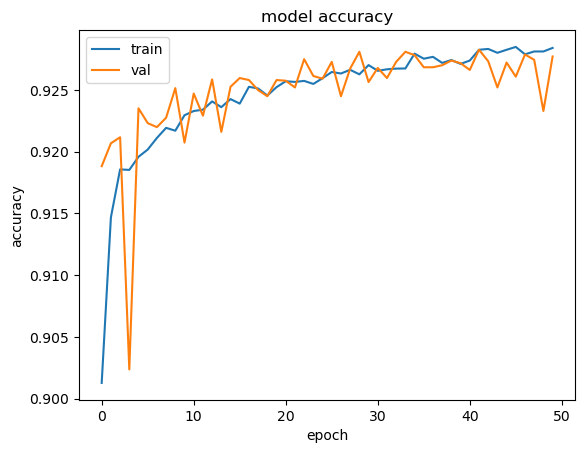

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# If I use scaling methods on this data,my model overfits for some reason. So this is where I will conclude this model.
# I'll try to dive deeper in the next dataset.